# Problem Statement
    Consider only the below columns and prepare a prediction model for predicting Price.

    Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

    Model -- model of the car
    Price  -- Offer Price in EUROs	
    Age_08_04 -- Age in months as in August 2004	
    Mfg_Month -- Manufacturing month (1-12)	
    Mfg_Year	-- Manufacturing Year
    KM -- Accumulated Kilometers on odometer
    Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
    HP -- Horse Power
    Met_Color	 -- Metallic Color?  (Yes=1, No=0)
    Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
    Automatic	-- Automatic ( (Yes=1, No=0)
    cc -- Cylinder Volume in cubic centimeters
    Doors -- Number of doors
    Cylinders	-- Number of cylinders
    Gears -- Number of gear positions
    Quarterly_Tax -- Quarterly road tax in EUROs
    Weight -- Weight in Kilograms
    Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
    BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
    Guarantee_Period -- 	Guarantee period in months
    ABS -- Anti-Lock Brake System (Yes=1, No=0)
    Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
    Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
    Airco -- Airconditioning  (Yes=1, No=0)
    Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
    Boardcomputer -- Boardcomputer  (Yes=1, No=0)
    CD_Player -- CD Player  (Yes=1, No=0)
    Central_Lock -- Central Lock  (Yes=1, No=0)
    Powered_Windows -- Powered Windows  (Yes=1, No=0)
    Power_Steering -- Power Steering  (Yes=1, No=0)
    Radio -- Radio  (Yes=1, No=0)
    Mistlamps	-- Mistlamps  (Yes=1, No=0)
    Sport_Model -- Sport Model  (Yes=1, No=0)
    Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
    Metallic_Rim --Metallic Rim  (Yes=1, No=0)
    Radio_cassette -- Radio Cassette  (Yes=1, No=0)
    Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
#Importing Necessary Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data

data= pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
data.head(5)

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

# EDA

In [3]:
#Dataset Description

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [5]:
#Fetching necessary column

df=data.iloc[:,[2,3,6,8,12,13,15,16,17]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [6]:
df=df.rename({'Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qt','Weight':'wt'},axis=1)

In [7]:
df.duplicated().sum()

1

In [8]:
df= df.drop_duplicates().reset_index(drop= True)
df

Price  age     km   hp    cc  doors  gears   qt    wt
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1430   7500   69  20544   86  1300      3      5   69  1025
1431  10845   72  19000   86  1300      3      5   69  1015
1432   8500   71  17016   86  1300      3      5   69  1015
1433   7250   70  16916   86  1300      3      5   69  1015
1434   6950   76      1  110  1600      5      5   19  1114

[1435 rows x 9 columns]

In [9]:
df.describe()

Price          age             km           hp            cc  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             doors        gears           qt           wt  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

# correlation

In [10]:
df.corr()

Price       age        km        hp        cc     doors     gears  \
Price  1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
age   -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
km    -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
hp     0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
cc     0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
doors  0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
gears  0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
qt     0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
wt     0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

             qt        wt  
Price  0.211508  0.575869  
age   -0.193319 -0.466484  
km     0.283312 -0.023969  
hp    -0.302287  0.087143  
cc     0.305982  0.335077  
doors  0.107353  0.301734  
gears -0.005125  0.021238  
qt     1.000000  0.621988  
wt     0.621988  1.000000

<AxesSubplot:>

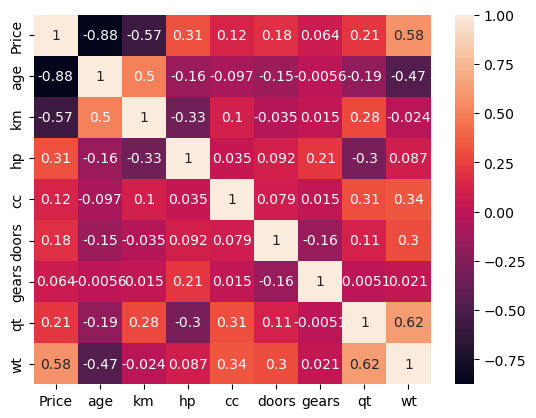

In [11]:
sns.heatmap(df.corr(), annot=True)

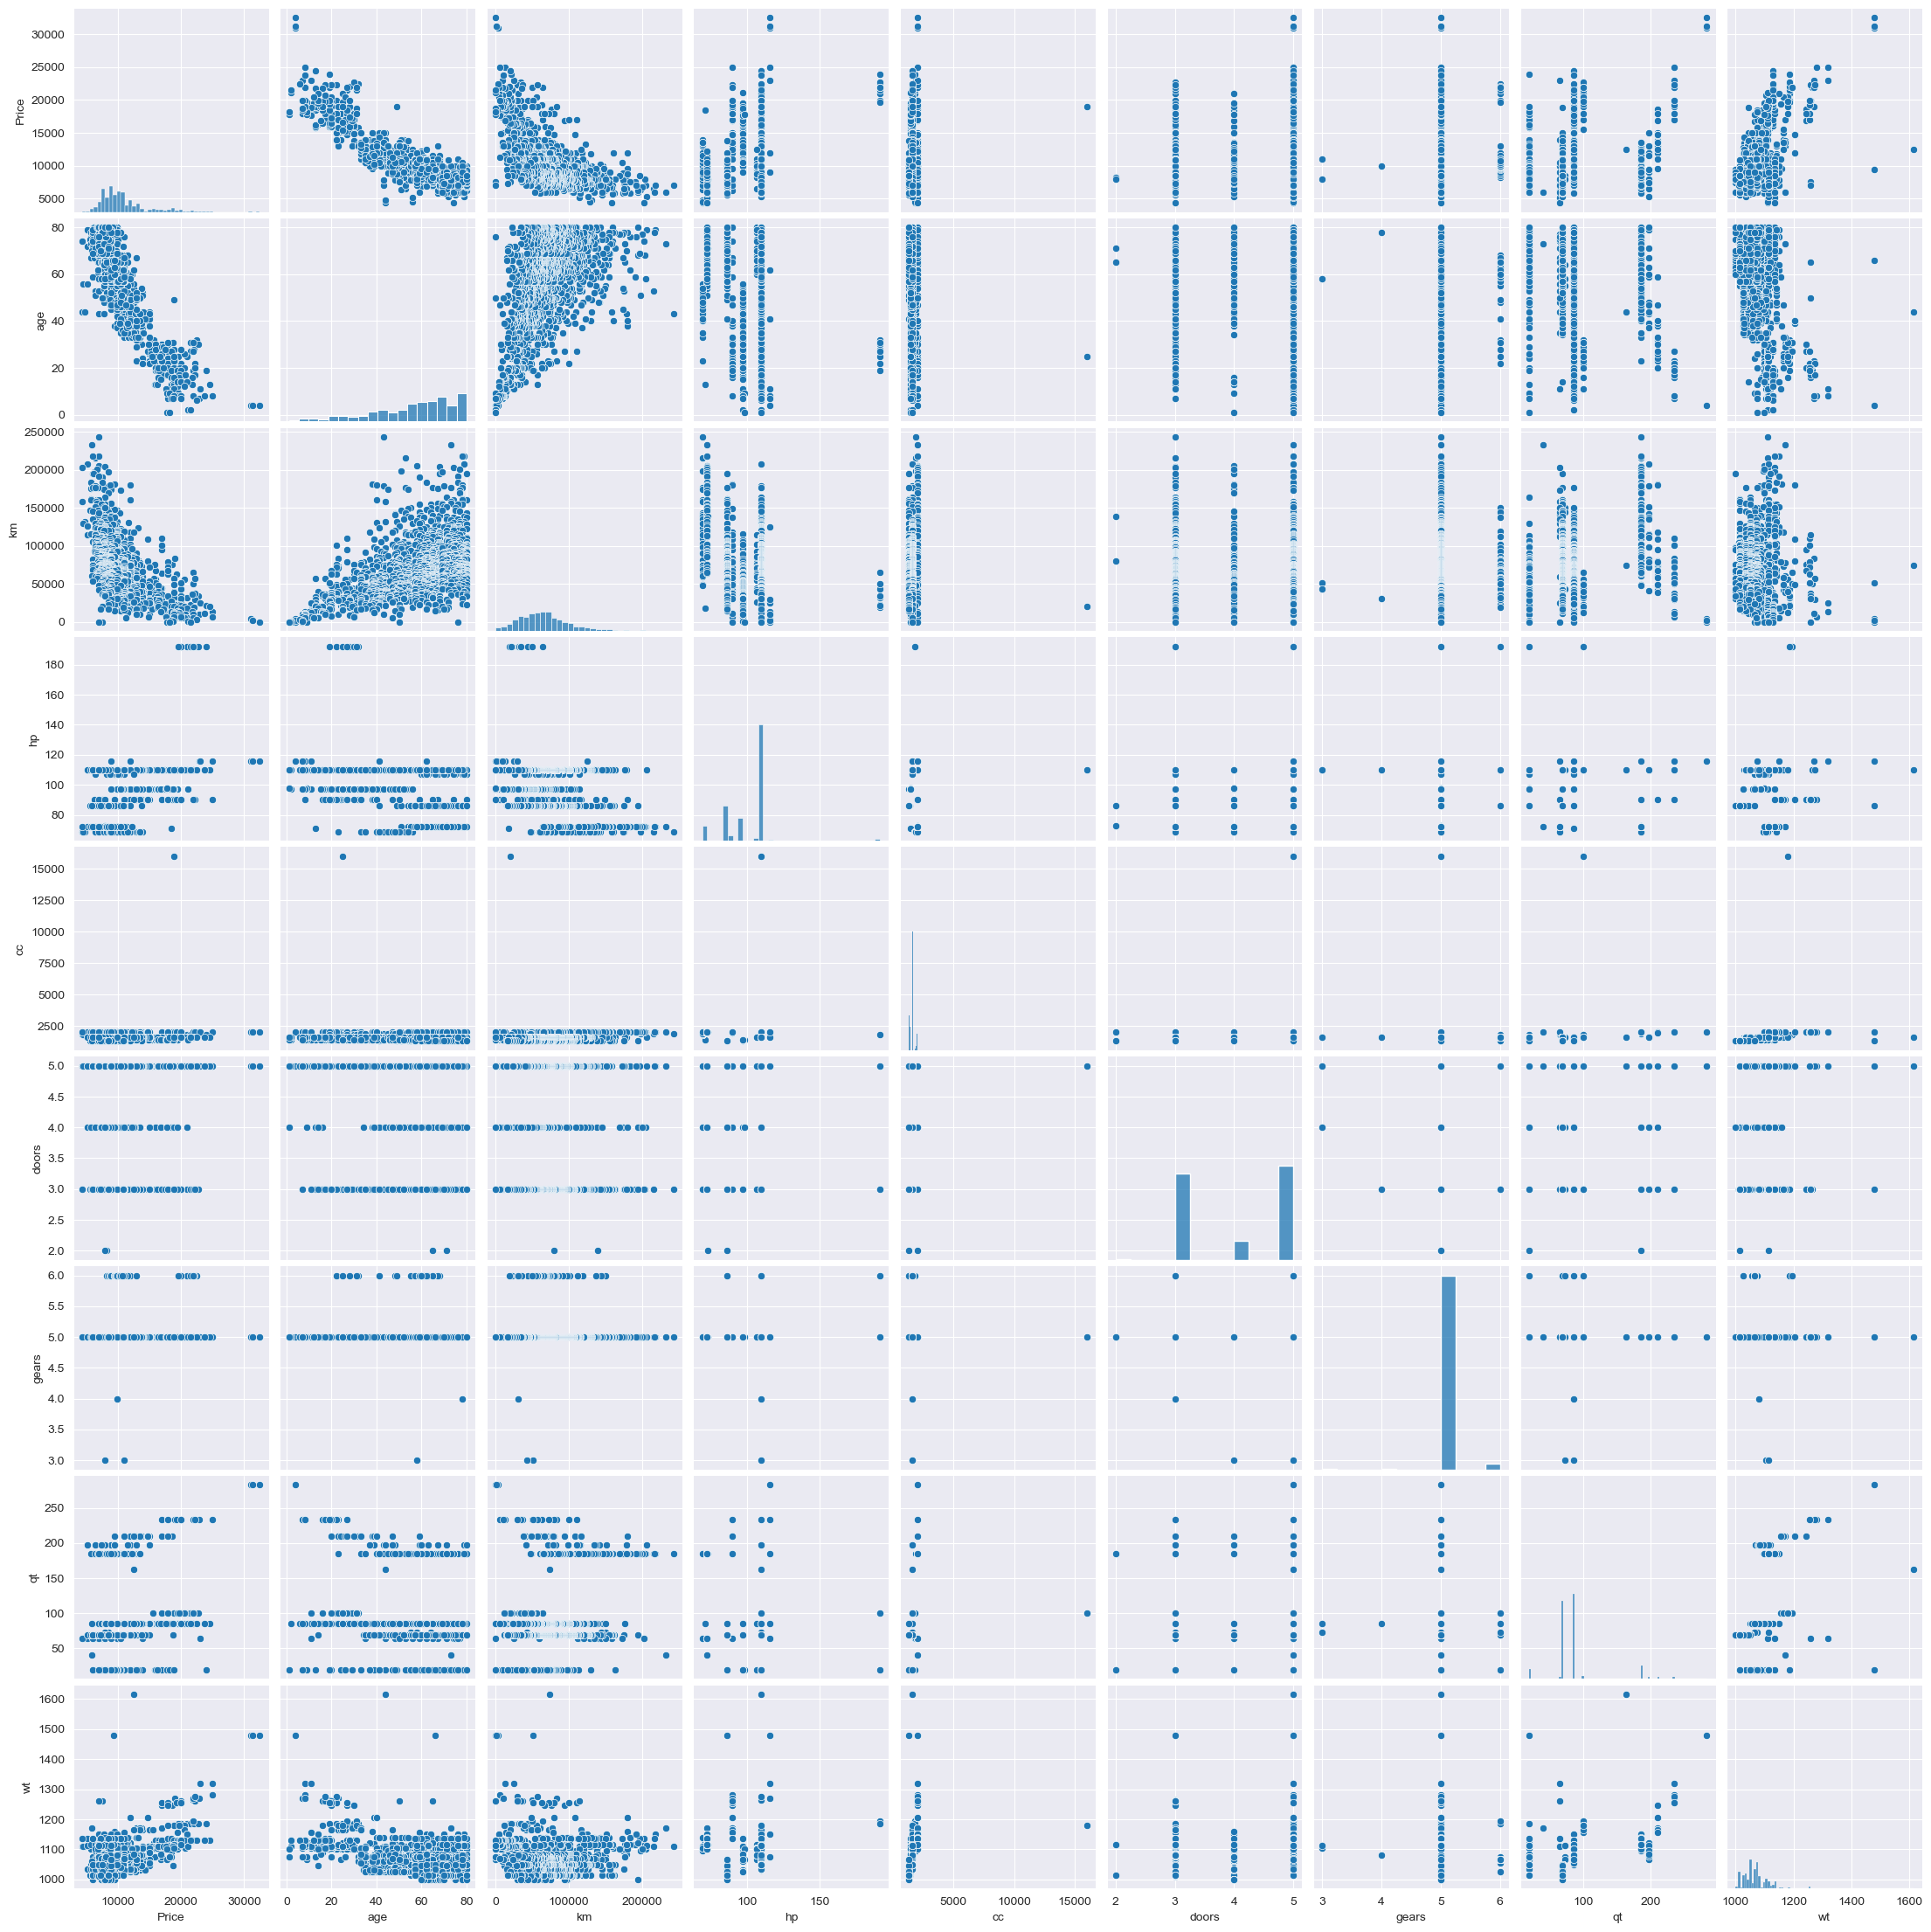

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Model Building

In [13]:
import statsmodels.formula.api as mlr

In [14]:
model= mlr.ols('Price~age+km+hp+cc+doors+gears+qt+wt', data=df).fit()

In [15]:
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
qt              3.858805
wt             16.855470
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:10:45   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#R^2 Value

model.rsquared, model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [18]:
#Print values for t value and p value

print(f"t value is\n{model.tvalues}\nP value is\n {model.pvalues}")

t value is
Intercept    -3.875273
age         -46.551876
km          -16.552424
hp           11.209719
cc           -1.316436
doors        -0.023012
gears         3.034563
qt            2.944198
wt           15.760663
dtype: float64
P value is
 Intercept     1.113392e-04
age          1.879217e-288
km            1.994713e-56
hp            5.211155e-28
cc            1.882393e-01
doors         9.816443e-01
gears         2.452430e-03
qt            3.290363e-03
wt            1.031118e-51
dtype: float64


# Simple Linear Regression Model

In [19]:
model_cc=mlr.ols('Price~cc',data=df).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.29e-06
Time:                        23:10:55   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_door=mlr.ols('Price~doors',data=df).fit()
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.40e-12
Time:                        23:10:56   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_pcd=mlr.ols('Price~cc+doors',data=df).fit()
model_pcd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.55e-15
Time:                        23:10:58   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

# VIF

In [22]:
rsq_age=mlr.ols('age~km+hp+cc+doors+gears+qt+wt',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=mlr.ols('km~age+hp+cc+doors+gears+qt+wt',data=df).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=mlr.ols('hp~age+km+cc+doors+gears+qt+wt',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=mlr.ols('cc~age+km+hp+doors+gears+qt+wt',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=mlr.ols('doors~age+km+hp+cc+gears+qt+wt',data=df).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=mlr.ols('gears~age+km+hp+cc+doors+qt+wt',data=df).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=mlr.ols('qt~age+km+hp+cc+doors+gears+wt',data=df).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=mlr.ols('wt~age+km+hp+cc+doors+gears+qt',data=df).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [23]:
d={'Factors':['age','km','hp','cc','doors','gears','qt','wt'],'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_df=pd.DataFrame(d)
vif_df

Factors       vif
0     age  1.876236
1      km  1.757178
2      hp  1.419180
3      cc  1.163470
4   doors  1.155890
5   gears  1.098843
6      qt  2.295375
7      wt  2.487180

# Residual Analysis (Q-Q Plot)

Text(0.5, 1.0, 'Residual Plot')

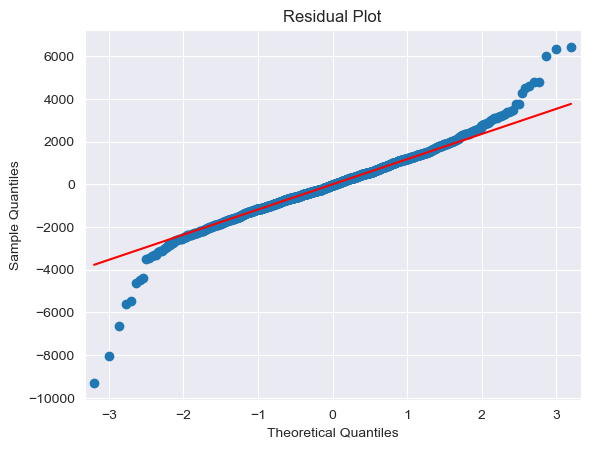

In [24]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title('Residual Plot')

In [25]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [27]:
##Test for Homoscedasticity or Heteroscedasticity

def get_standardized_value(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Residuals')

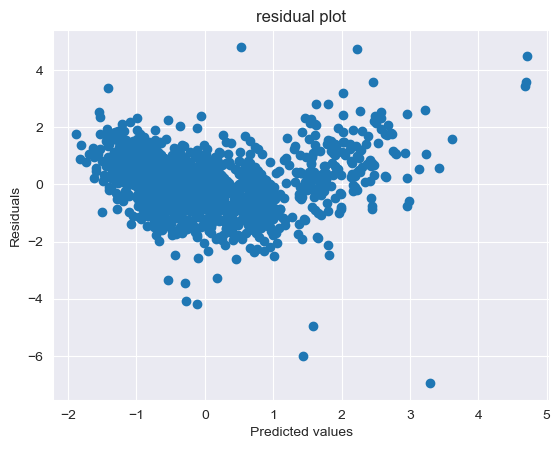

In [28]:
plt.scatter(get_standardized_value(model.fittedvalues),get_standardized_value(model.resid))
plt.title('residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

In [29]:
#Using Residual Regression Plots code graphics.plot_regress_exog

from statsmodels.graphics.regressionplots import influence_plot

eval_env: 1


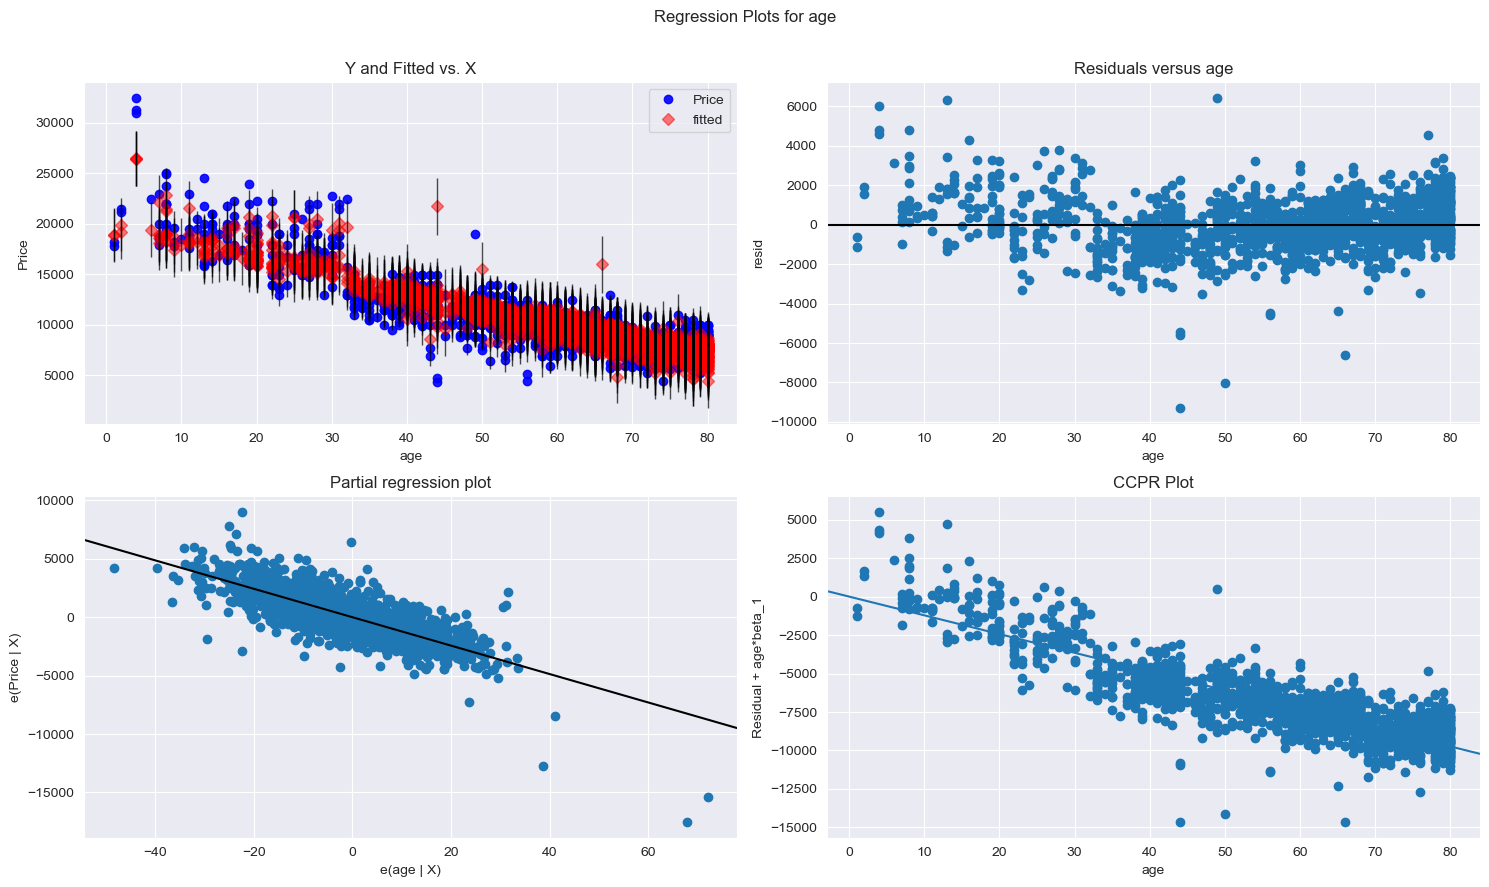

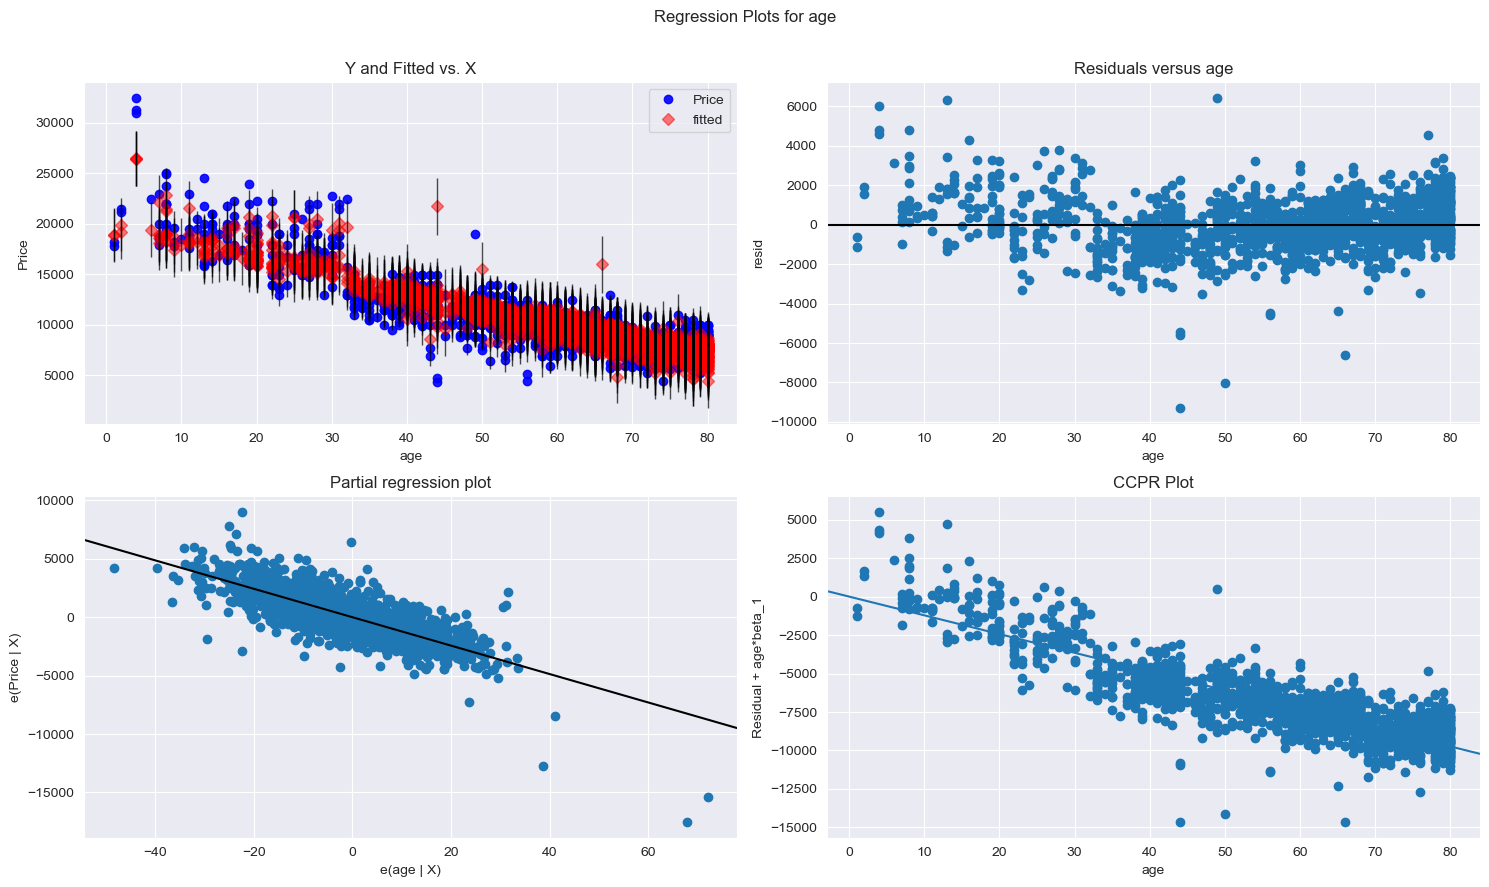

In [30]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'age',fig=fig)

eval_env: 1


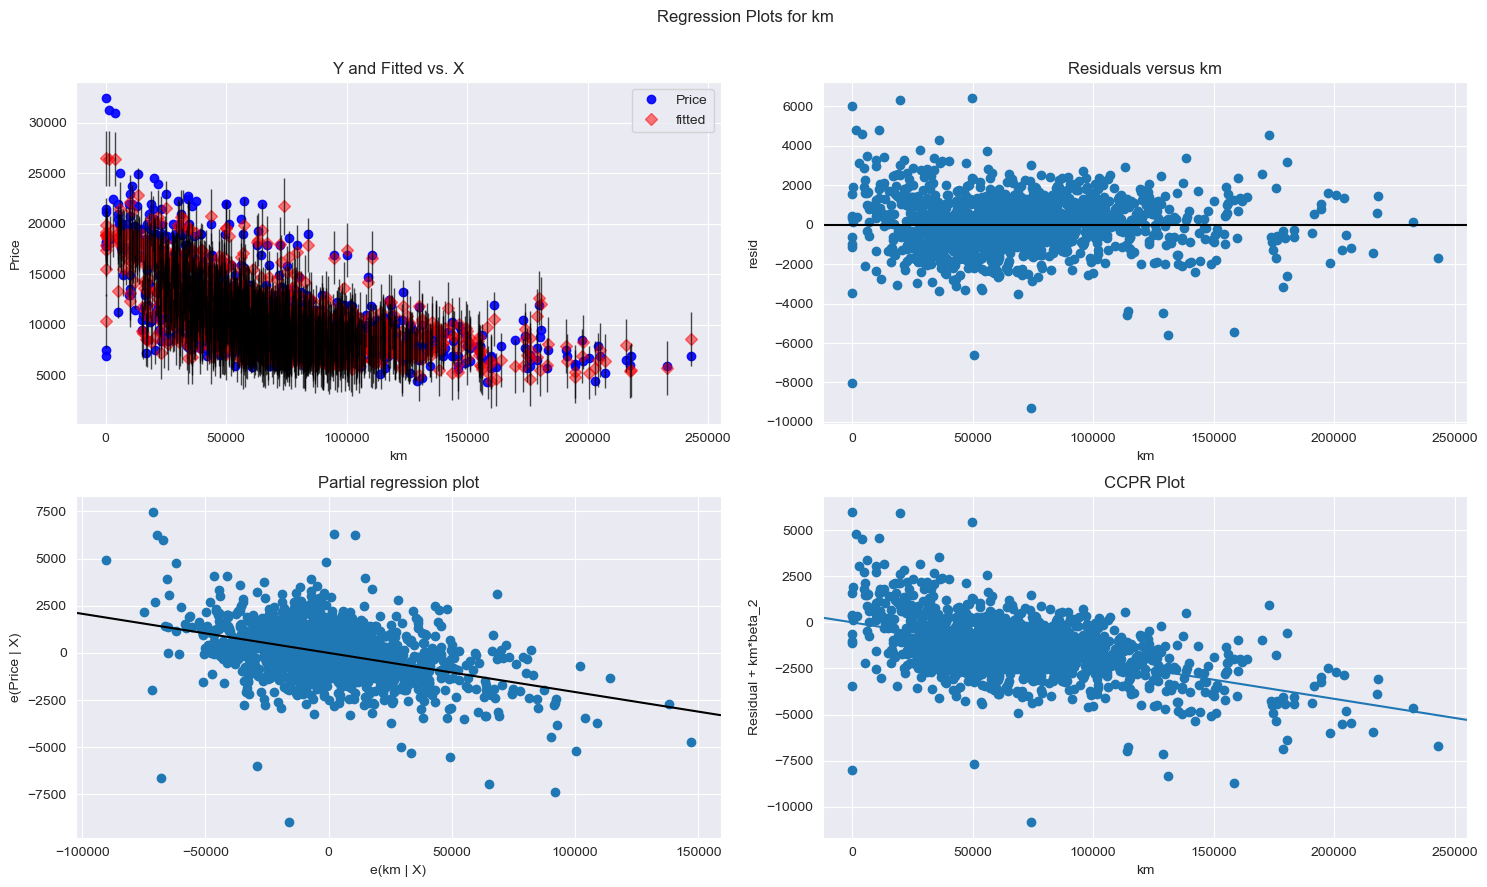

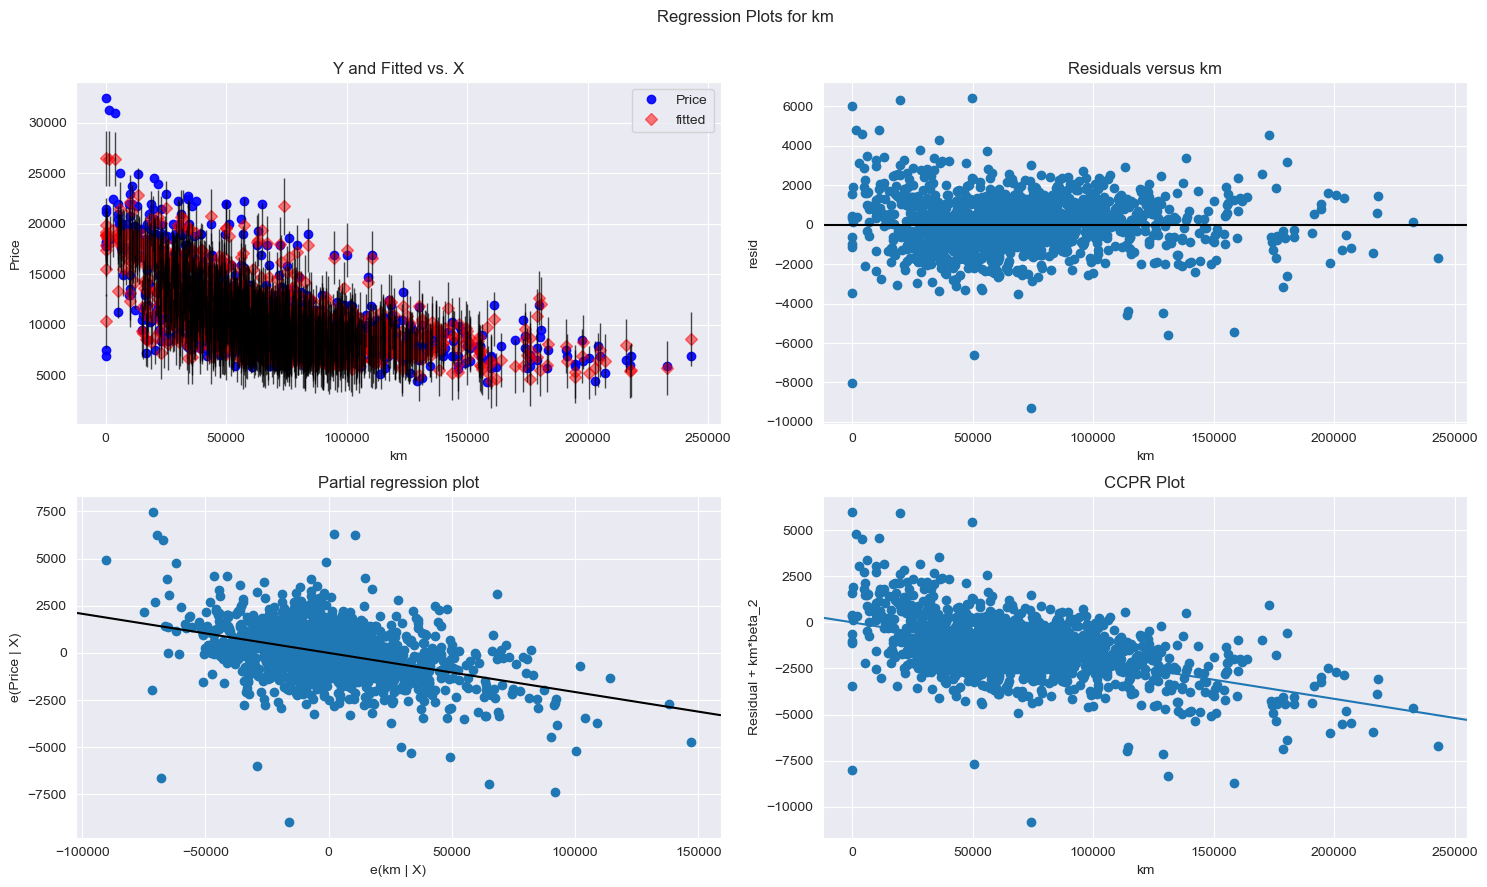

In [31]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'km',fig=fig)

eval_env: 1


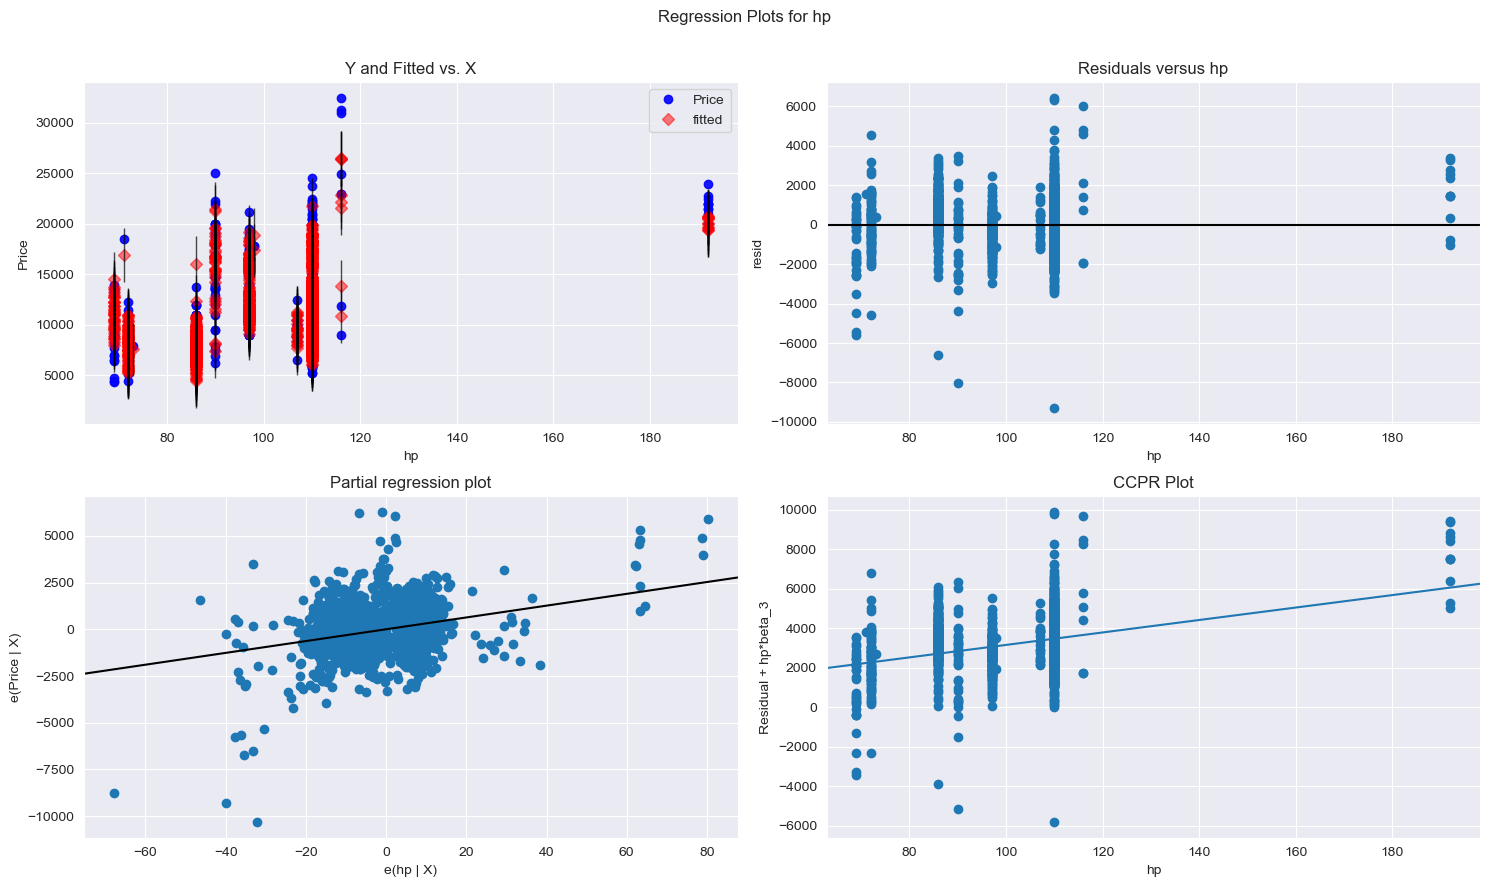

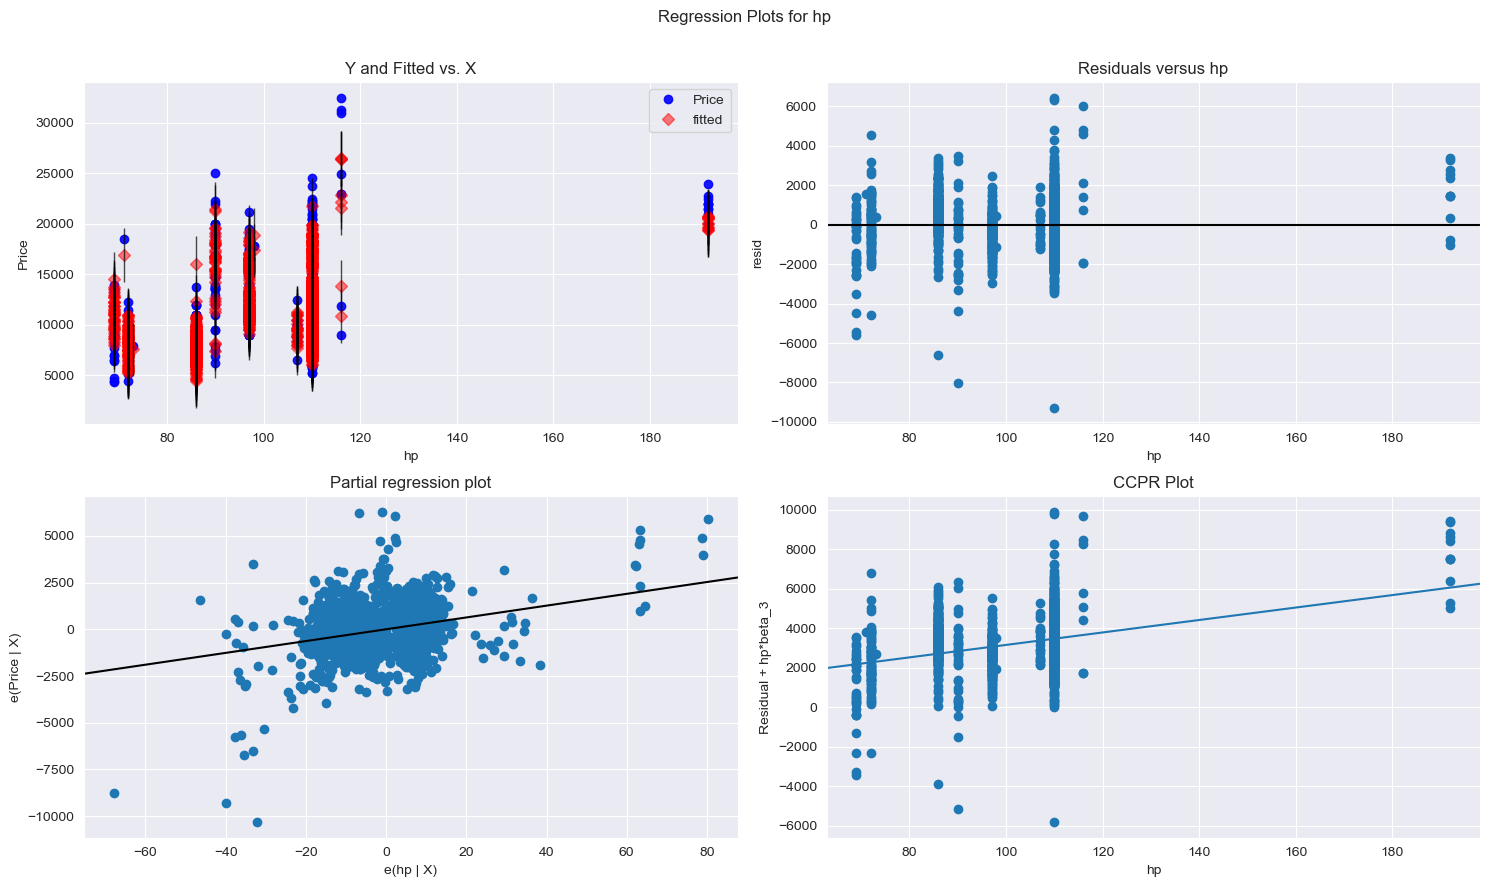

In [32]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)

eval_env: 1


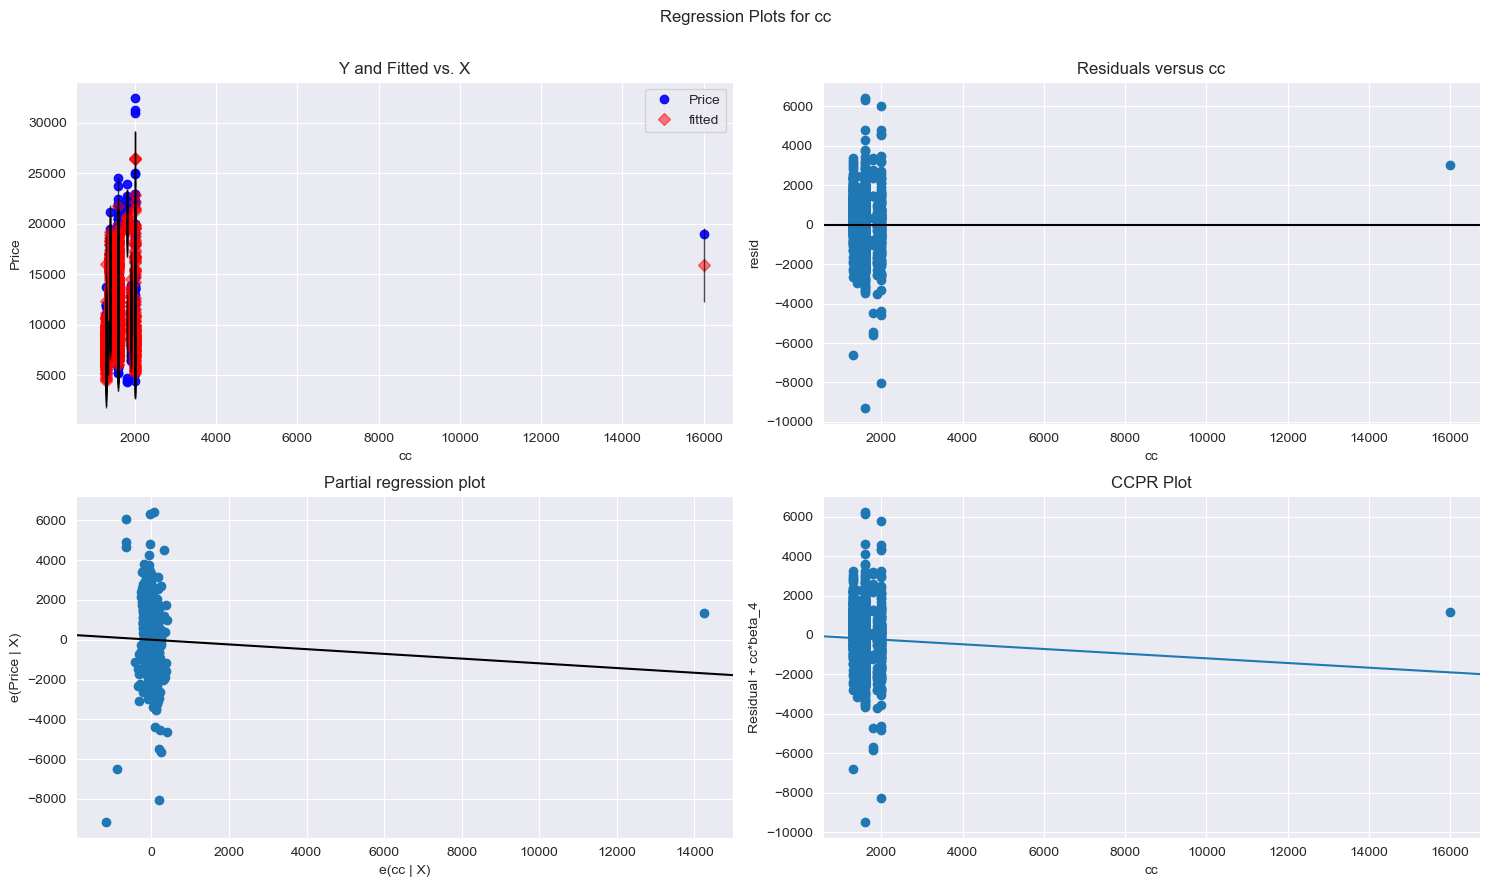

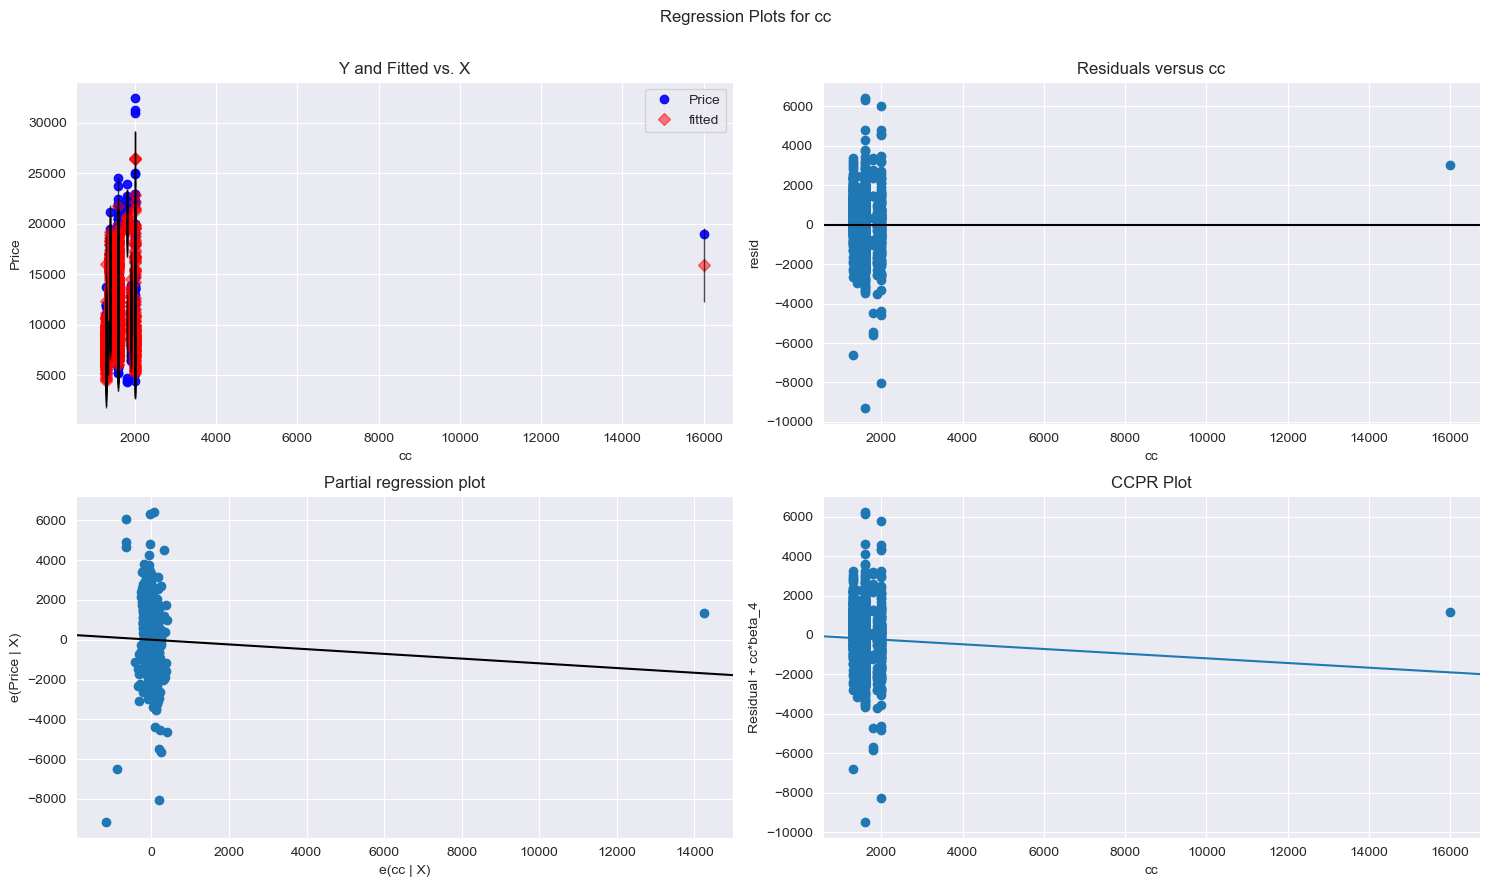

In [33]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)

eval_env: 1


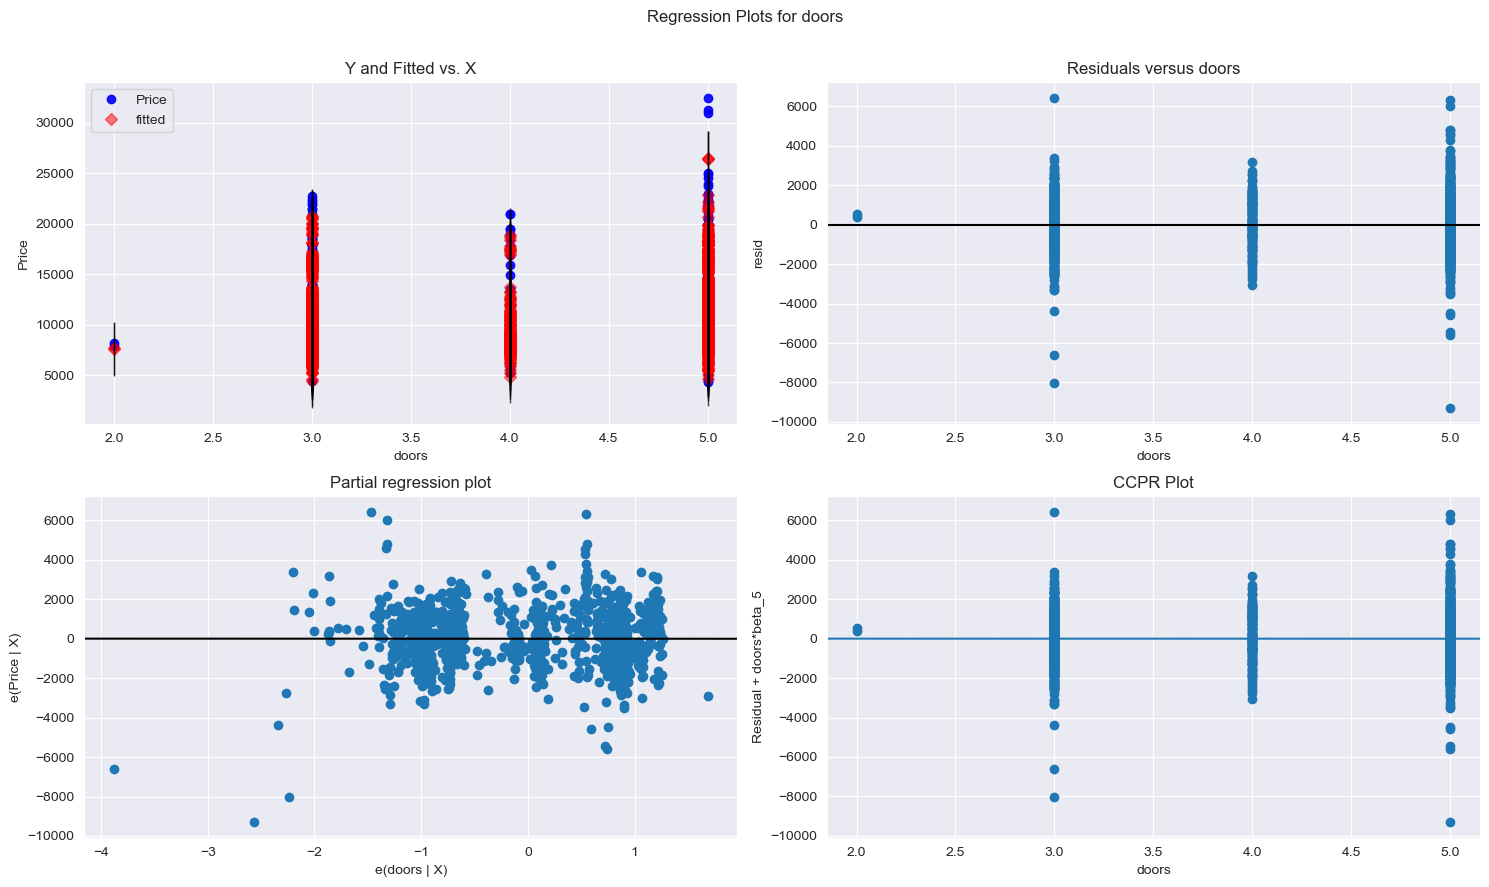

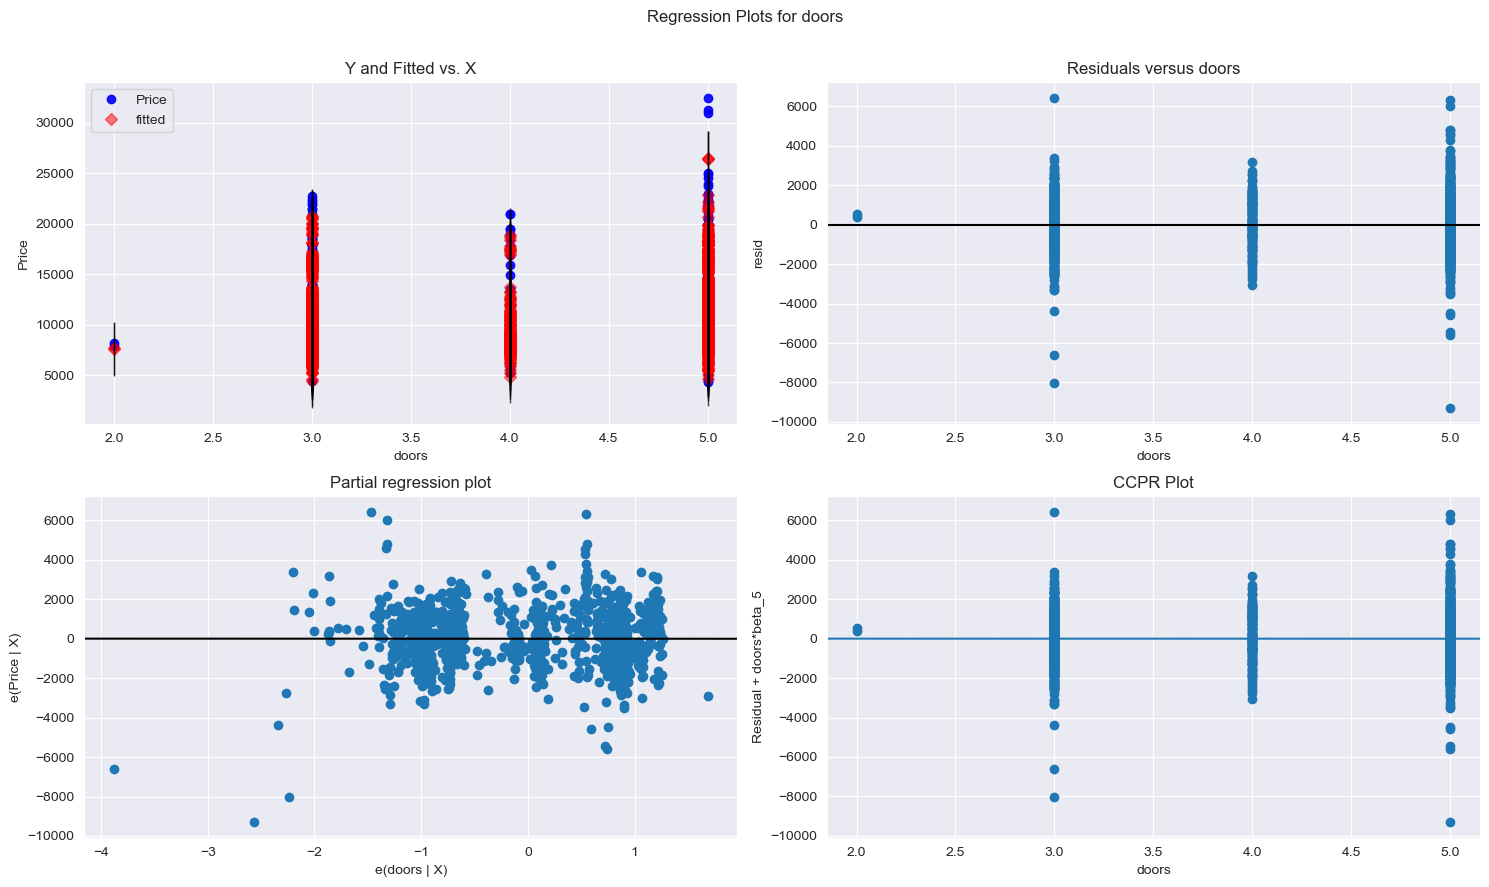

In [34]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)

eval_env: 1


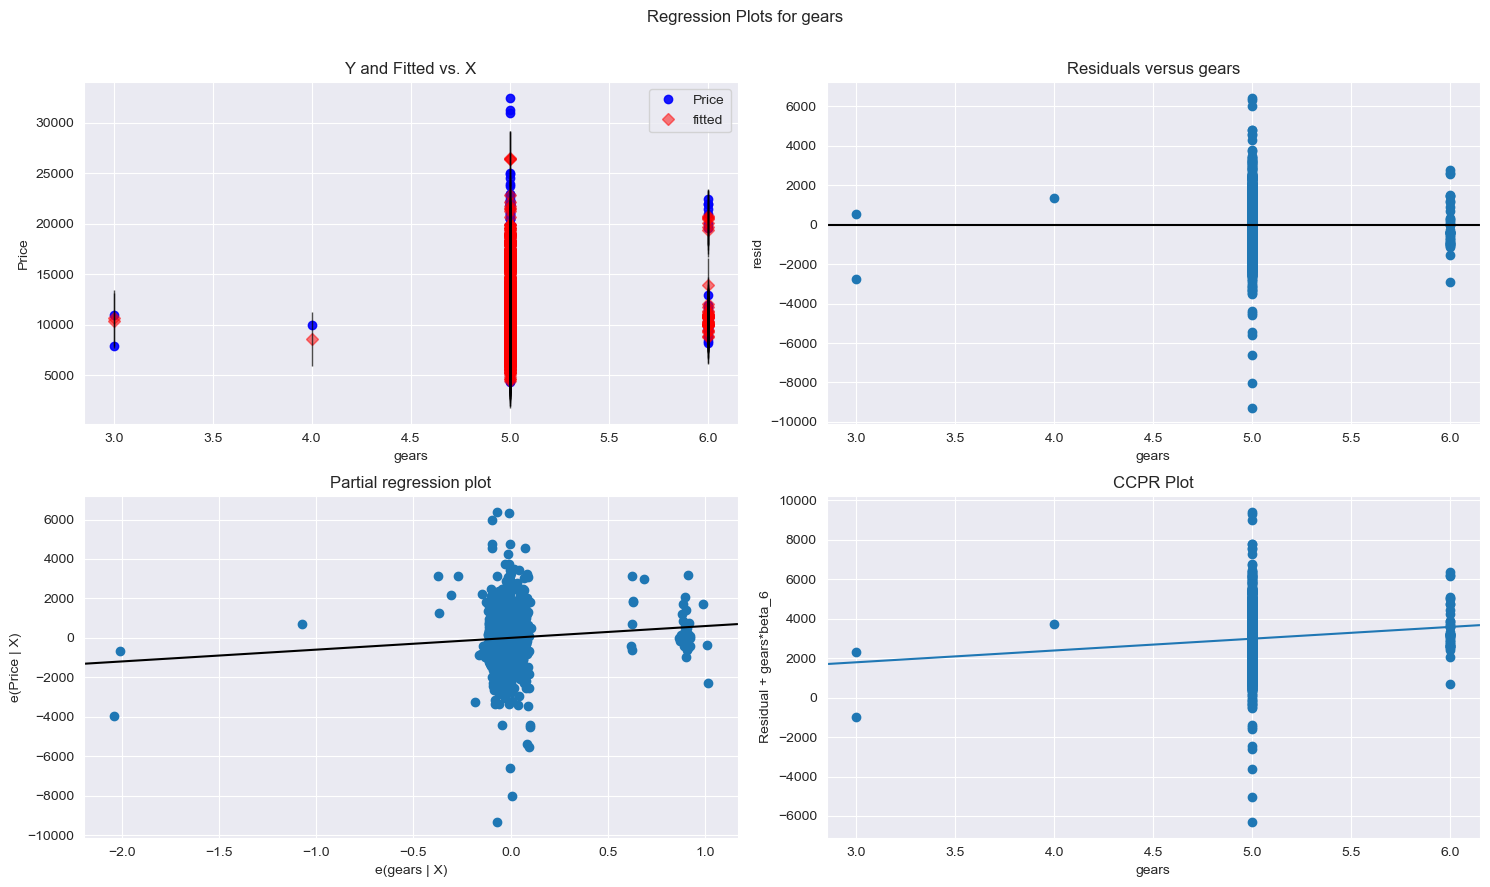

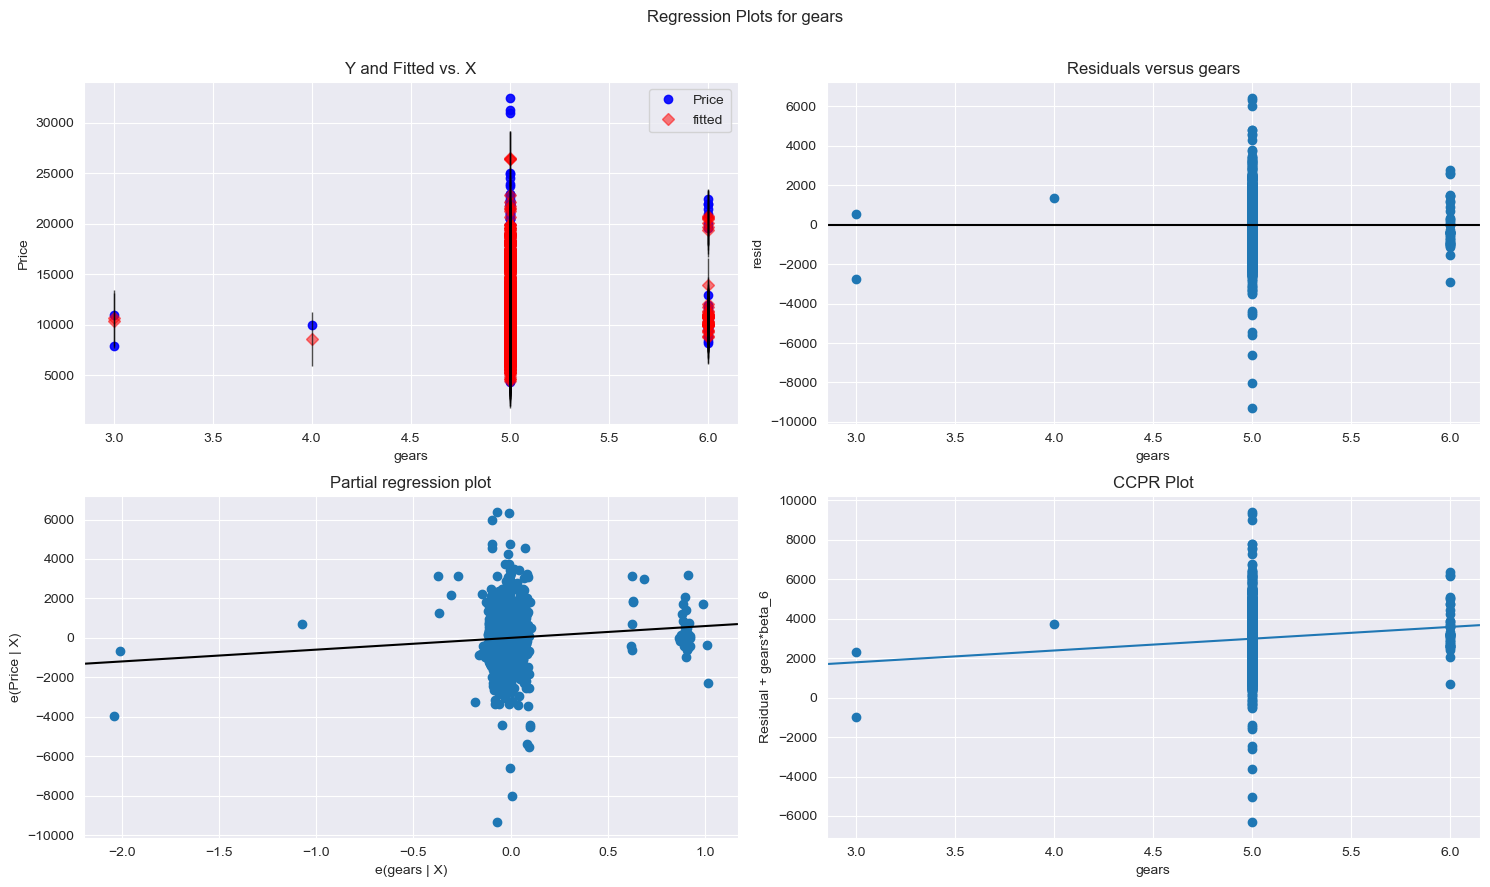

In [35]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)

eval_env: 1


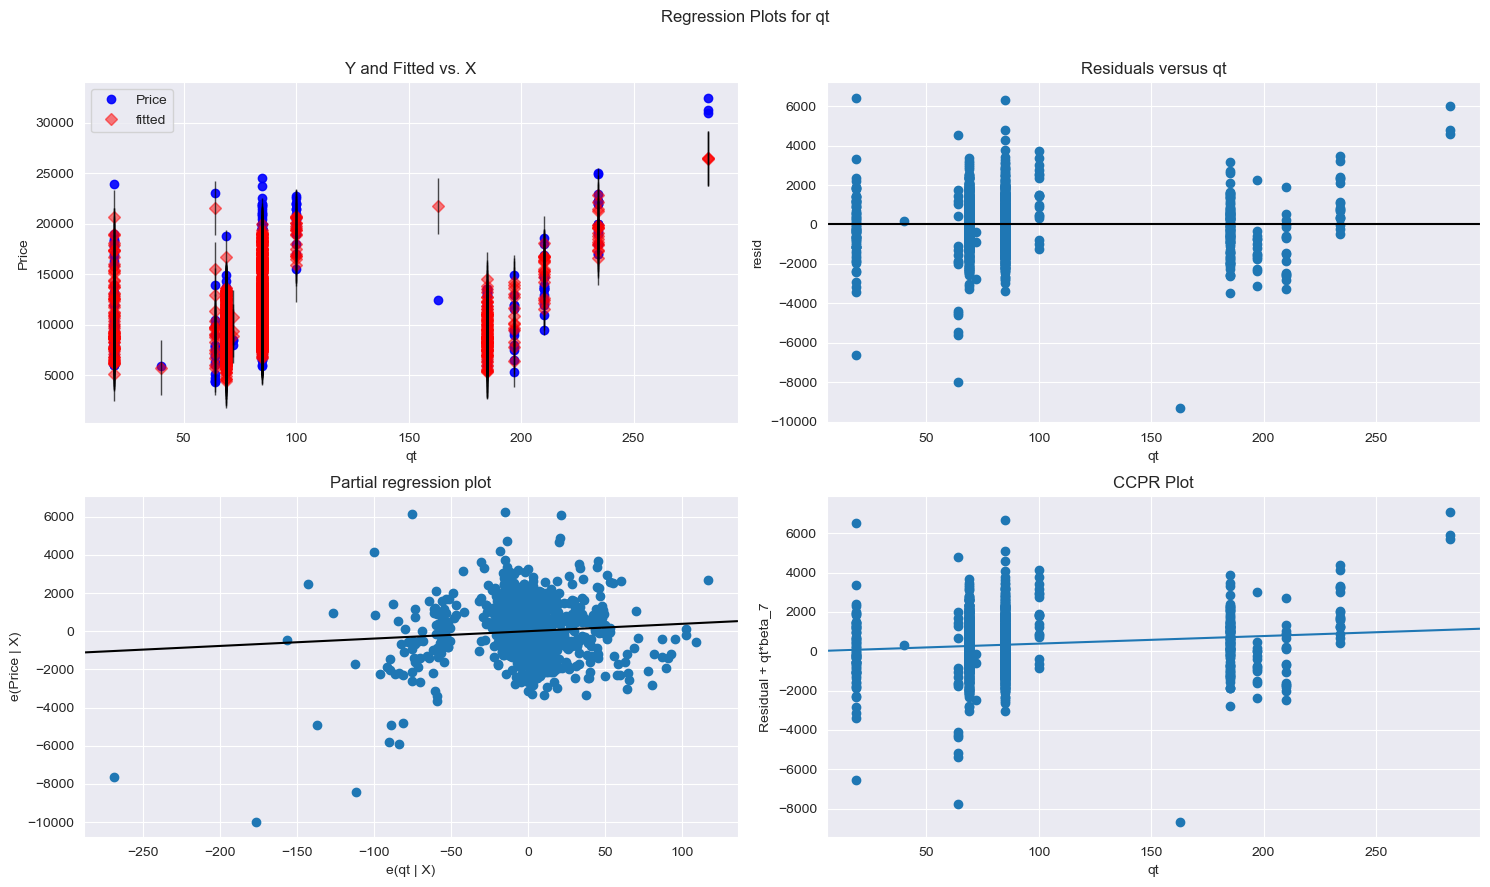

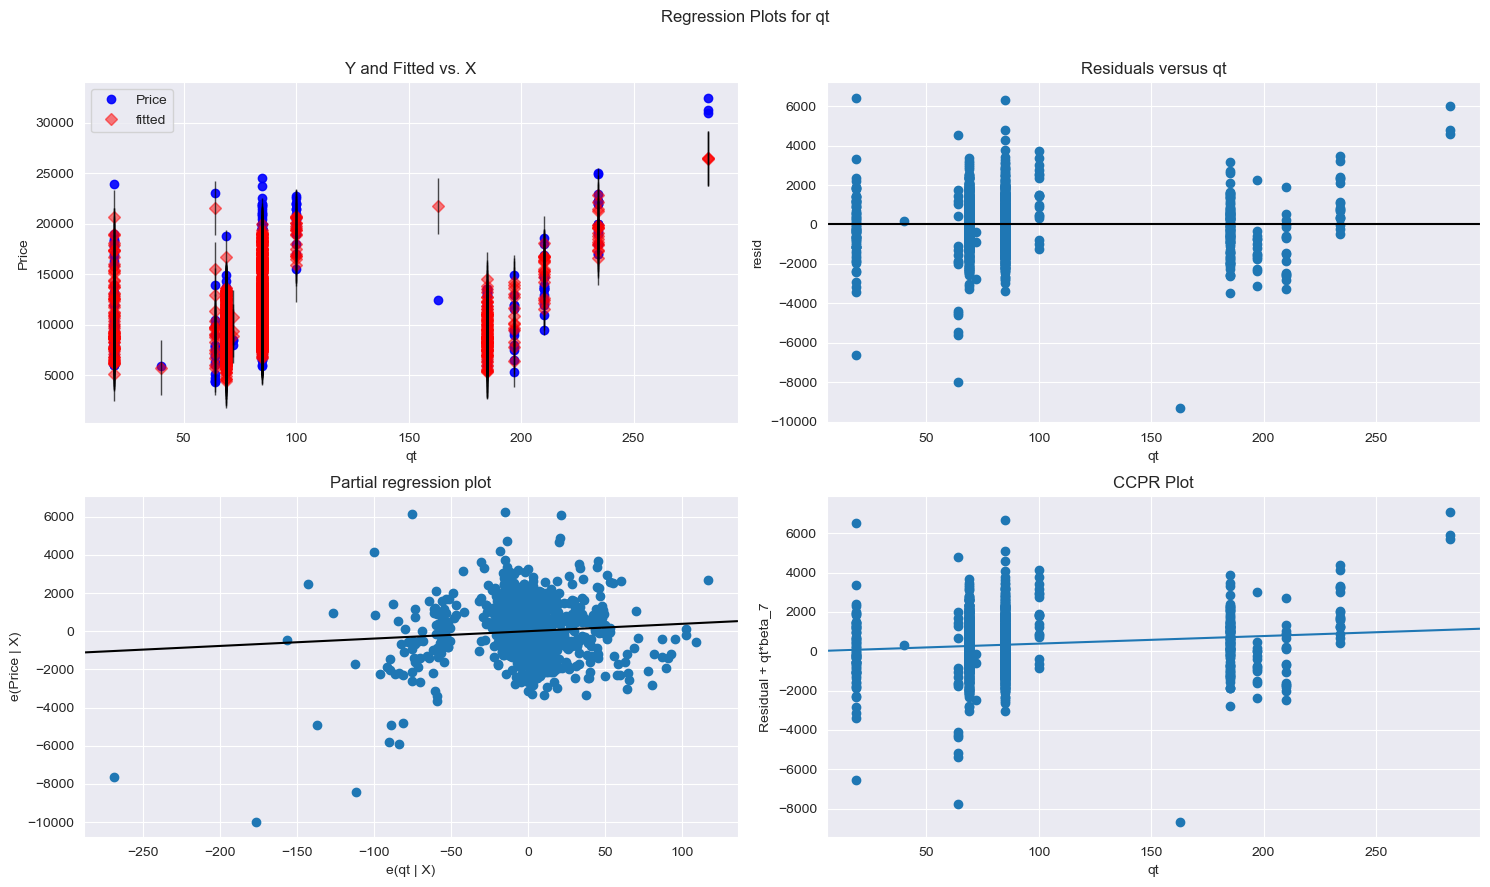

In [36]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'qt',fig=fig)

eval_env: 1


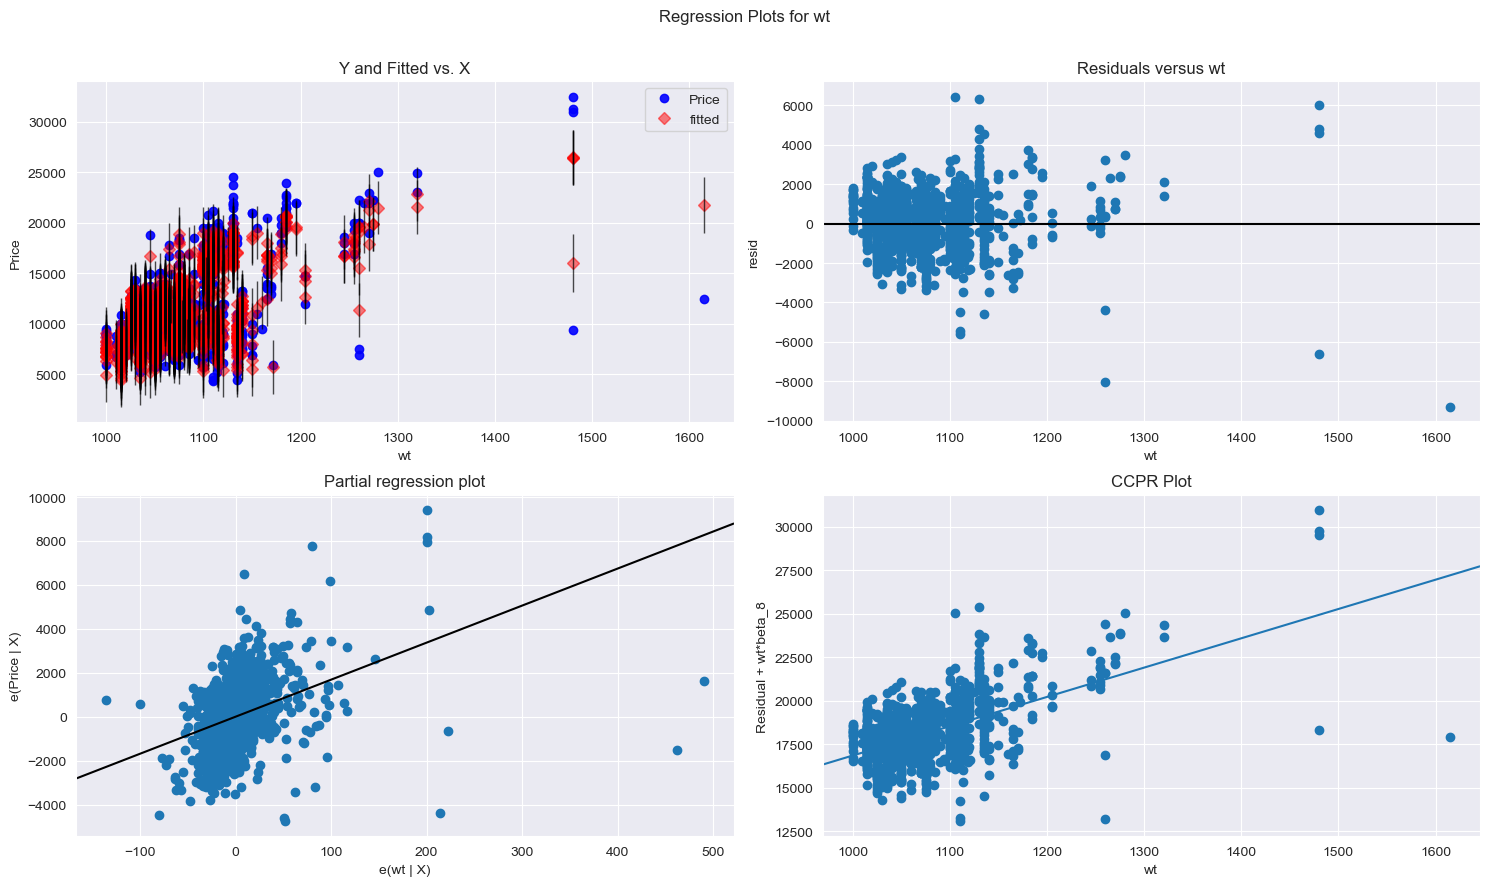

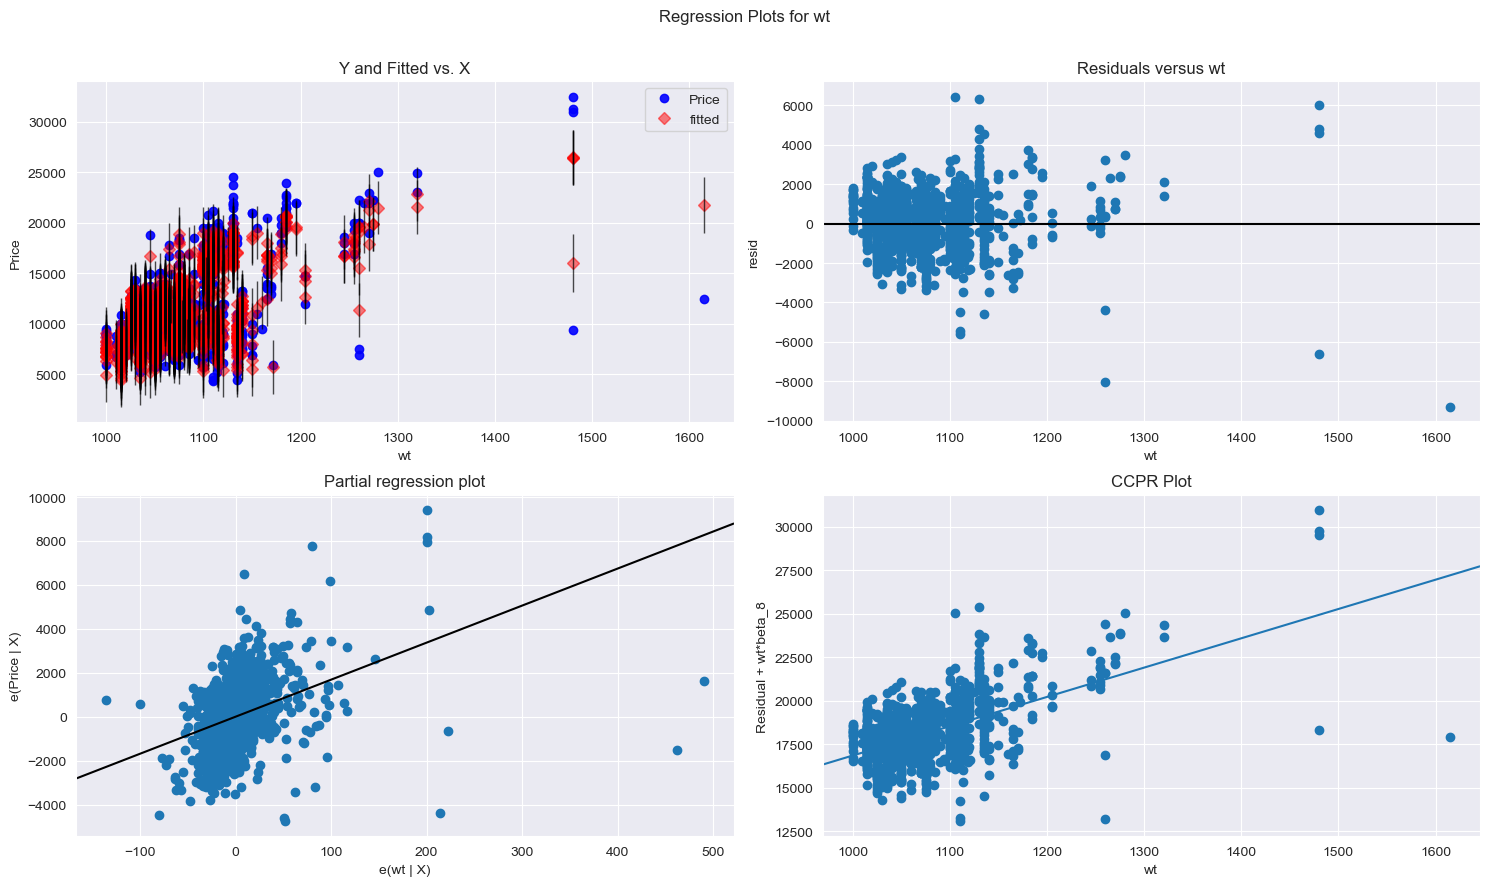

In [37]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model,'wt',fig=fig)

# cook Distance

In [38]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

Text(0, 0.5, 'cooks distance')

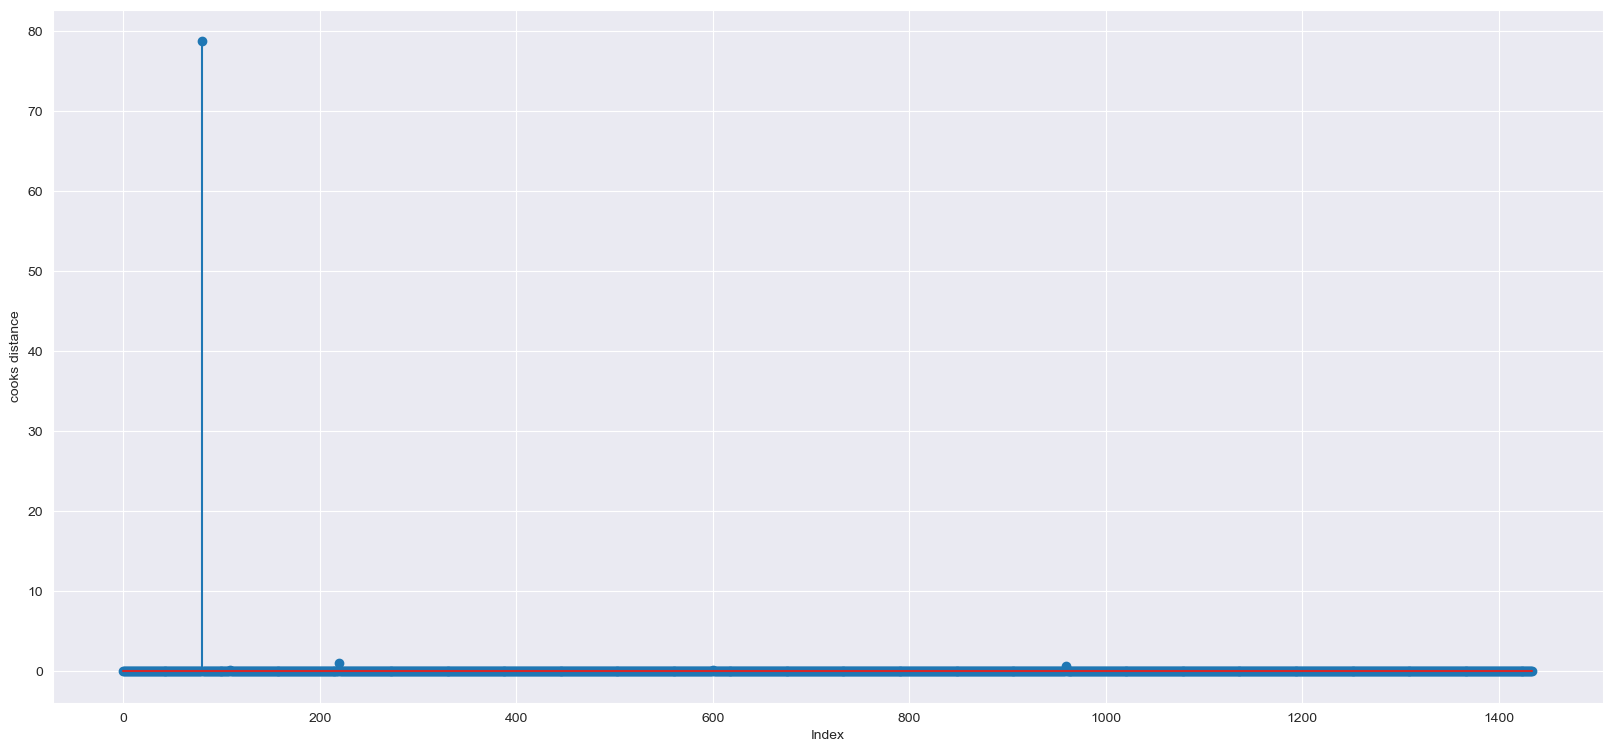

In [39]:
fig=plt.figure(figsize=(20,9))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Index')
plt.ylabel('cooks distance')

In [40]:
np.argmax(c),np.max(c)

(80, 78.72950582248232)

# Leverage Value

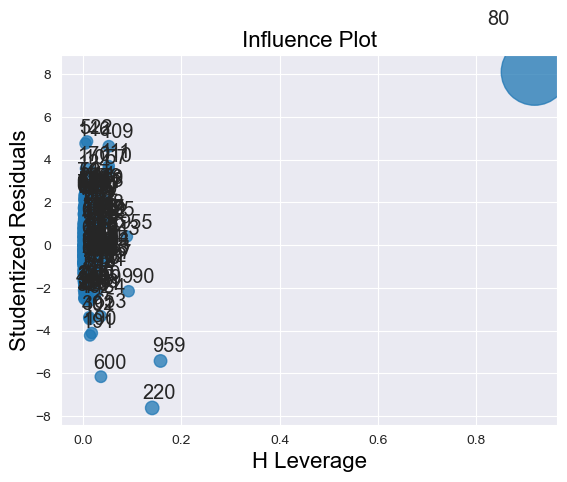

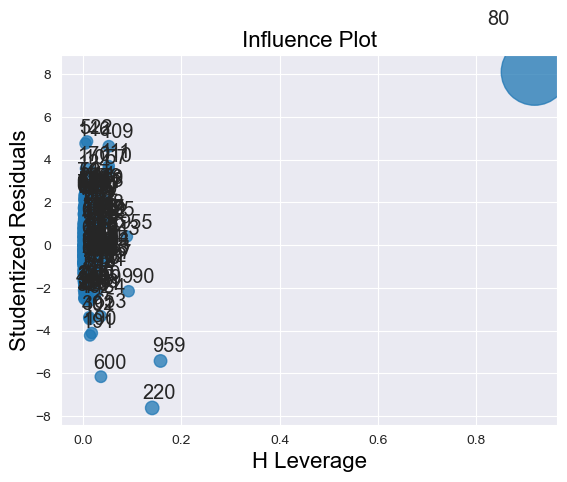

In [41]:
influence_plot(model)

In [42]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [43]:
df[df.index.isin([80])]

Price  age     km   hp     cc  doors  gears   qt    wt
80  18950   25  20019  110  16000      5      5  100  1180

In [44]:
# Improving the Model

In [45]:
df=df.drop(df.index[[80]],axis=0).reset_index(drop=True)
df

Price  age     km   hp    cc  doors  gears   qt    wt
0     13500   23  46986   90  2000      3      5  210  1165
1     13750   23  72937   90  2000      3      5  210  1165
2     13950   24  41711   90  2000      3      5  210  1165
3     14950   26  48000   90  2000      3      5  210  1165
4     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1429   7500   69  20544   86  1300      3      5   69  1025
1430  10845   72  19000   86  1300      3      5   69  1015
1431   8500   71  17016   86  1300      3      5   69  1015
1432   7250   70  16916   86  1300      3      5   69  1015
1433   6950   76      1  110  1600      5      5   19  1114

[1434 rows x 9 columns]

# Final Model

In [46]:
while model.rsquared<0.90:
    for c in [np.max(c)>0.5]:
        model=mlr.ols('Price~age+km+hp+cc+doors+gears+qt+wt',data=df).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c),np.max(c)
        df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df
    else:
        model=mlr.ols('Price~age+km+hp+cc+doors+gears+qt+wt',data=df).fit()
        model.rsquared , model.aic
        print('Thus rsquared is improved to',model.rsquared)

Thus rsquared is improved to 0.8765926307402282
Thus rsquared is improved to 0.8839684606741538
Thus rsquared is improved to 0.8882395145171204
Thus rsquared is improved to 0.8902571486612915
Thus rsquared is improved to 0.8909888960319987
Thus rsquared is improved to 0.8922595280462808
Thus rsquared is improved to 0.8933621011392295
Thus rsquared is improved to 0.8947147371605556
Thus rsquared is improved to 0.8955233405057648
Thus rsquared is improved to 0.8930210061069088
Thus rsquared is improved to 0.8939546425147169
Thus rsquared is improved to 0.8954112430715817
Thus rsquared is improved to 0.8960182592139027
Thus rsquared is improved to 0.8968403506948497
Thus rsquared is improved to 0.8964026771830705
Thus rsquared is improved to 0.8958538146890626
Thus rsquared is improved to 0.8953750500147551
Thus rsquared is improved to 0.8949455651565241
Thus rsquared is improved to 0.8960864004304144
Thus rsquared is improved to 0.8955820765034093
Thus rsquared is improved to 0.893023390

In [47]:
df

Price  age     km  hp    cc  doors  gears   qt    wt
0     13750   23  72937  90  2000      3      5  210  1165
1     13950   24  41711  90  2000      3      5  210  1165
2     14950   26  48000  90  2000      3      5  210  1165
3     13750   30  38500  90  2000      3      5  210  1170
4     12950   32  61000  90  2000      3      5  210  1170
...     ...  ...    ...  ..   ...    ...    ...  ...   ...
1326   8450   80  23000  86  1300      3      5   69  1015
1327   7500   69  20544  86  1300      3      5   69  1025
1328  10845   72  19000  86  1300      3      5   69  1015
1329   8500   71  17016  86  1300      3      5   69  1015
1330   7250   70  16916  86  1300      3      5   69  1015

[1331 rows x 9 columns]

In [48]:
model.rsquared, model.aic

(0.9002238270483123, 22112.04928325874)

# Model Prediction

In [49]:
new=pd.DataFrame({'age':[15,17],'km':[45000,43000],'hp':[80,85],'cc':[1299,1199],'doors':[6,4],'gears':[5,6],'qt':[70,69],'wt':[1020,1110]})
new

age     km  hp    cc  doors  gears  qt    wt
0   15  45000  80  1299      6      5  70  1020
1   17  43000  85  1199      4      6  69  1110

In [50]:
model.predict(new)

0    13986.995707
1    17959.532812
dtype: float64